In [2]:
# imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import brainflow
#from brainflow.data_filter import DataFilter, FilterTypes, AggOperations, WindowOperations


In [22]:
# load data
photo=np.load(r'data\misc\aux_run-2.npy')
eeg=np.load(r'data\misc\eeg_run-2.npy')

In [23]:
photo.shape

(3, 47738)

In [24]:
eeg.shape

(8, 47738)

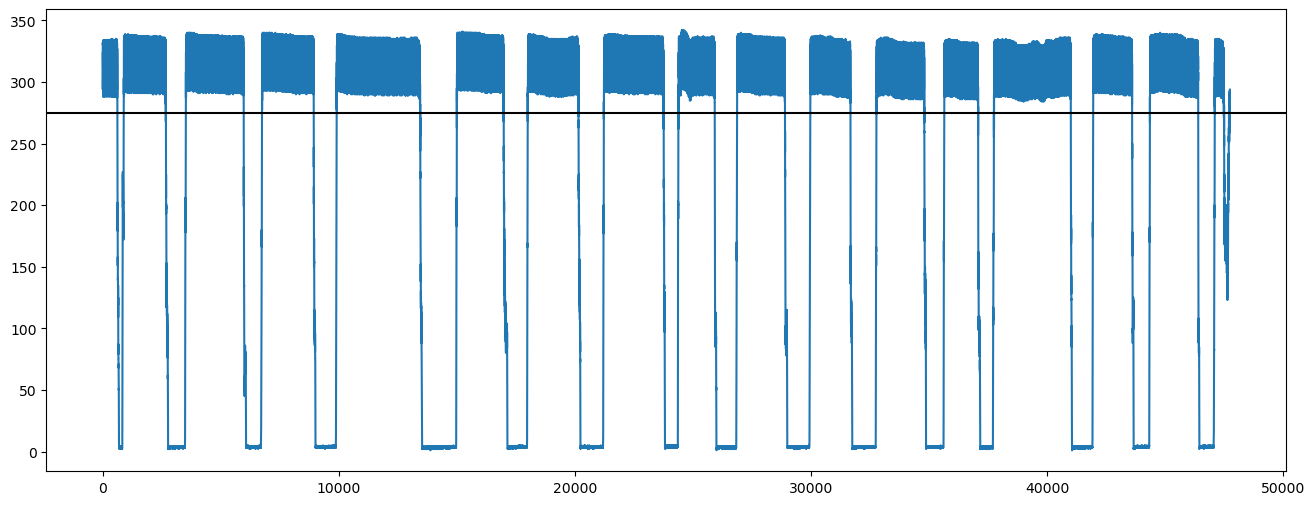

In [25]:
# define threshold for speaking
plt.figure(figsize=(16,6))
plt.plot(photo[1])
plt.axhline(y=275, color='black')

In [26]:
# process photo data
photo_data = photo[1]
mask = (photo_data >= 275)
behavioral_state = mask.astype(float)

unique, counts = np.unique(behavioral_state, return_counts=True)
print(f"Behavior measured in binary: {unique} \nspeaking (False): {counts[0]} \nnot speaking (True):{counts[1]}")

Behavior measured in binary: [0. 1.] 
speaking (False): 14400 
not speaking (True):33338


### 01_Preprocessing 

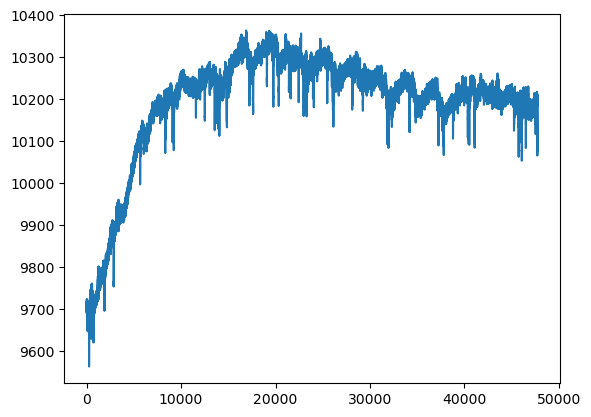

In [27]:
# process example raw eeg data
eeg_data = eeg[0][1:]
eeg_data

plt.plot(eeg_data)

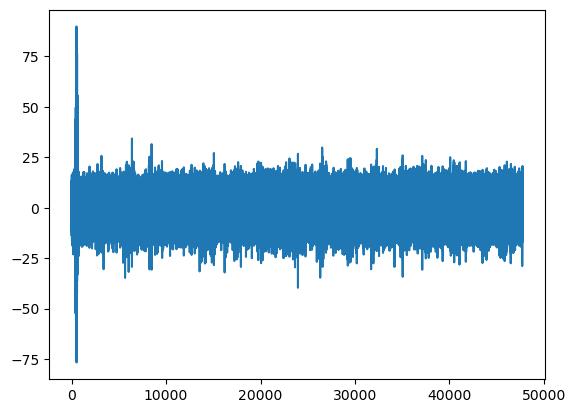

In [28]:
# discrete difference
new_eeg = np.diff(eeg_data)
plt.plot(new_eeg)

# Typical EEG signal amplitude: Between 10 µV and 100 µV (microvolts).

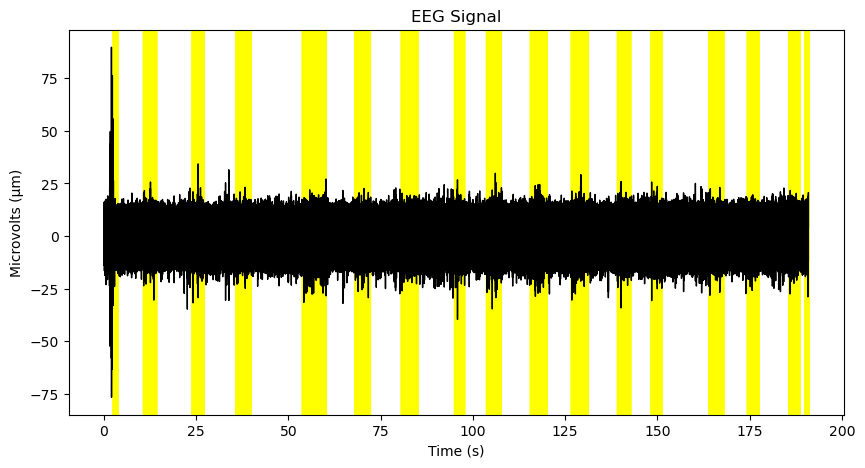

In [126]:
sampling_rate = 250 
time = np.linspace(0, len(new_eeg)/sampling_rate, len(new_eeg))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time, new_eeg, color='black', linewidth=1)
for i in range(len(behavioral_state) - 1):
    if behavioral_state[i] == 0:
        ax.axvspan(time[i], time[i + 1], color='yellow', alpha=0.3)  # Light yellow background if speaking

# Labels and display
ax.set_xlabel("Time (s)")
ax.set_ylabel(u"Microvolts (\u00b5"+"m)")
plt.title("EEG Signal")
plt.show()

In [ ]:
# messy timestamps
messy_index = np.where(np.diff(behavioral_state))[0]
messy_index.shape

(166,)

In [ ]:
# cleaned indices for time stamping
clean_index = np.array([])
differences = np.diff(messy_index)

for i in np.where(differences >= 50)[0]:
    clean_index = np.append(messy_index[int(i)], clean_index)

clean_index = np.sort(clean_index)
clean_index.shape

(33,)

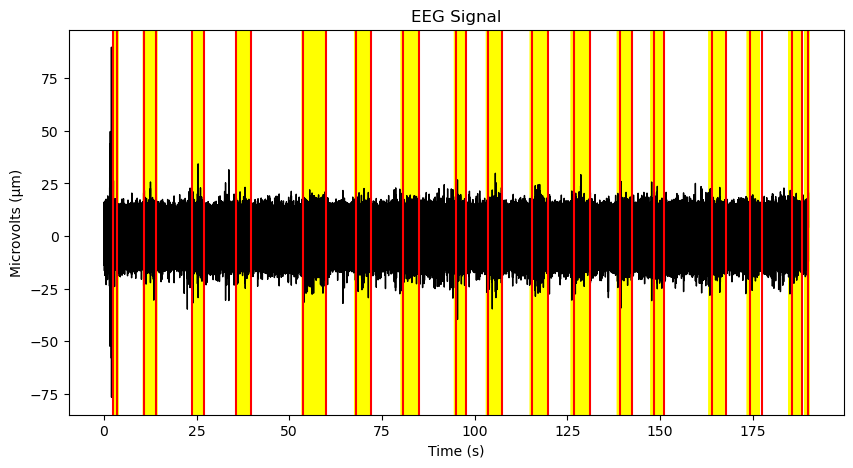

In [121]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time, new_eeg, color='black', linewidth=1)
for i in range(len(behavioral_state) - 1):
    if behavioral_state[i] == 0:
        ax.axvspan(time[i], time[i + 1], color='yellow', alpha=0.3)  # Light yellow background if speaking

for timestamp in clean_index:
    plt.axvline(timestamp/250, color='red')

# Labels and display
ax.set_xlabel("Time (s)")
ax.set_ylabel(u"Microvolts (\u00b5"+"m)")
plt.title("EEG Signal")
plt.show()

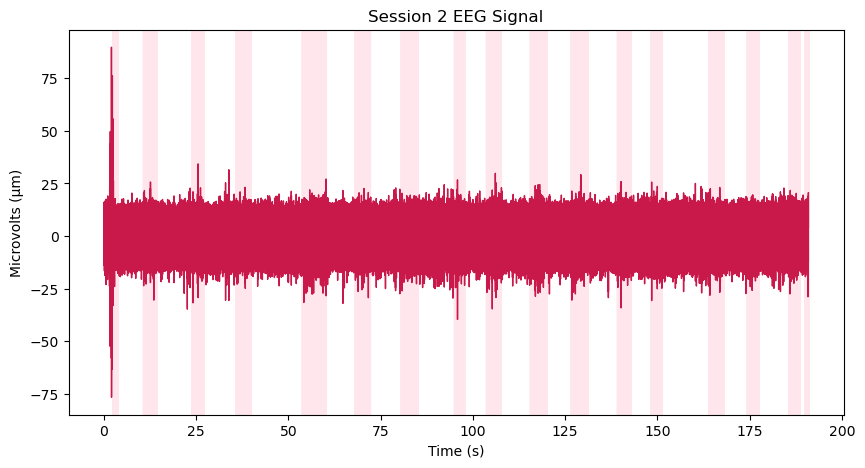

In [ ]:
# barbie coded
sampling_rate = 250 
time = np.linspace(0, len(new_eeg)/sampling_rate, len(new_eeg))

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(time, new_eeg, color='#c9184a', linewidth=1)
for i in range(len(behavioral_state) - 1):
    if behavioral_state[i] == 0:
        ax.axvspan(time[i], time[i + 1], color='#ffe5ec', alpha=0.3)  # Light pink background if speaking

# Labels and display
ax.set_xlabel("Time (s)")
ax.set_ylabel(u"Microvolts (\u00b5"+"m)")
plt.title("Session 2 EEG Signal")
plt.show()

### Check GUI trial results

In [2]:
is_it_labeled = pd.read_csv(r"C:\Users\Andre\projects\COGS189\Cogs_189_Project\trial_2025-03-03.csv")

In [3]:
is_it_labeled

,Unnamed: 0,time,topic,truth_value
0,0,1.741038e+09,Work,lie
1,0,1.741038e+09,Pets,lie
2,0,1.741038e+09,Food,lie
3,0,1.741038e+09,Future Goals/Dreams,fact
4,0,1.741038e+09,Education,lie
5,0,1.741038e+09,Travel,fact
6,0,1.741038e+09,Work,lie
7,0,1.741038e+09,Music,lie
8,0,1.741038e+09,Success,fact
9,0,1.741038e+09,Music,fact


### 02_Epoching

In [ ]:
# account for values removed during eeg processing
behavioral_state = behavioral_state[1:-1]

# clean index has 33 vals currently, this is because the 
# last val was a spacebar press to stop, let's remove that too
clean_index = clean_index[:-1]

# we should have an even number, 32 indicates 16 press on/off instances
# that is 15 trials and the first was the original press to initiate the gui

(32,)

In [152]:
# create timestamps from indices
epoch_times = np.array([])

for i in clean_index:
    timestamp = time[int(i)]
    epoch_times = np.append(epoch_times, timestamp)
    
epoch_times

array([  2.48405204,   3.55607449,  10.70822432,  14.07629488,
        23.88450035,  26.98456529,  35.74874888,  39.64083042,
        53.77712655,  60.00525702,  67.92942302,  72.00550841,
        80.59368832,  84.8937784 ,  95.01799049,  97.5340432 ,
       103.67017174, 107.44625084, 115.5784212 , 119.85451078,
       126.6626534 , 131.07074574, 139.17091543, 142.53898599,
       148.2871064 , 150.98716296, 163.9874353 , 167.77551465,
       174.379653  , 177.39571618, 185.57188746, 188.38794645])

In [153]:
clean_index

array([  621.,   889.,  2677.,  3519.,  5971.,  6746.,  8937.,  9910.,
       13444., 15001., 16982., 18001., 20148., 21223., 23754., 24383.,
       25917., 26861., 28894., 29963., 31665., 32767., 34792., 35634.,
       37071., 37746., 40996., 41943., 43594., 44348., 46392., 47096.])

In [162]:
sampling_rate

250

In [179]:
# define time window
DURATION = 3 #sec

trials = []
start_times = np.array([])
stop_times = np.array([])
for i in range(0,len(clean_index),2):
    start_i = clean_index[i] - (DURATION*sampling_rate)
    stop_i = clean_index[i+1] + (DURATION*sampling_rate)
    
    start_times = np.append(start_times, start_i)
    stop_times = np.append(stop_times, stop_i)

    trial = new_eeg[int(start_i):int(stop_i + 1)]
    trials.append(trial)

# remove first window (press to initiate gui)
trials.pop(0)
len(trials)

15

In [184]:
allies = np.load(r"C:\Users\Andre\projects\COGS189\Cogs_189_Projecteeg.npz")
print(allies.files)

['chan1', 'chan2', 'chan3', 'chan4', 'chan5', 'chan6', 'chan7', 'chan8']


In [185]:
allies_eeg = allies['chan1']
allies_eeg.shape

(47736,)

In [5]:

# global variables
DURATION = 3 #sec
sampling_rate = 250 #Hz
session = 2

# load data
all_channels = np.load(r"C:\Users\Andre\projects\COGS189\Cogs_189_Project\data\eeg\eeg_2.npz")
behavioral_state = np.load(r"C:\Users\Andre\projects\COGS189\Cogs_189_Project\data\behavior\behavior_2.npy")
fname_out = r"C:\Users\Andre\projects\COGS189\Cogs_189_Project"

# loop through channels
for i_chan in range(1,9):
    eeg = all_channels[f'chan{i_chan}']

    # behavior
    messy_index = np.where(np.diff(behavioral_state))[0]

    clean_index = np.array([])
    differences = np.diff(messy_index)
    for i in np.where(differences >= 50)[0]:
        clean_index = np.append(clean_index, messy_index[int(i)])

    if len(clean_index)%2 == 1:
        clean_index = clean_index[:-1]              # we should have an even number, 32 indicates 16 press on/off instances
    else:
        continue

    #behavioral_state = behavioral_state[1:-1]       # account for values removed during eeg processing
    
    # make trials per channel
    trials = []
    for i in range(0,len(clean_index),2):
        start_i = clean_index[i] - (DURATION*sampling_rate)
        stop_i = clean_index[i+1] + (DURATION*sampling_rate)
        
        trial = eeg[int(start_i):int(stop_i + 1)]
        trials.append(trial)

    # remove first window (press to initiate gui)
    trials.pop(0)
    print(len(trials))
    np.savez(fname_out + f"/eeg_{session}_chan{i_chan}.npz", trials)


15
15
15
15
15
15
15
15


c:\Users\Andre\anaconda3\envs\voytek_lab\lib\site-packages\numpy\lib\npyio.py:719: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  val = np.asanyarray(val)


In [14]:
chan1 = np.load(r"C:\Users\Andre\projects\COGS189\Cogs_189_Project\eeg_2_chan1.npz", allow_pickle=True)
chan1.files

['arr_0']

In [15]:
channel_ex = chan1['arr_0']

In [19]:
channel_ex.shape

(15,)

In [20]:
channel_ex

array([array([  8.69482859,  -9.2536222 , -11.35468618, ...,  12.94166004,
                0.11175872, -13.16517748])                                ,
       array([ -4.71621808,  10.61707862,   7.0407995 , ..., -13.85808156,
                3.91155528,  15.84738682])                                ,
       array([ -7.10785474,   9.79006407,   9.36538093, ...,  18.06020952,
                8.15838673, -20.3624392 ])                                ,
       array([ 13.00871527,  -5.2303082 , -11.77936933, ..., -11.04176176,
               -8.71718034,   7.66664835])                                ,
       array([  7.46548265, -10.86294781, -10.058285  , ..., -11.66761061,
               -7.91251754,   9.63360186])                                ,
       array([ 10.23709896,   1.56462211, -13.45575016, ...,   9.47713965,
                8.56071813,  -9.03010476])                                ,
       array([-12.65108736,   5.09619774,  11.89112805, ..., -11.48879665,
               -7.8

In [ ]:
# make trials per channel
trials = []
for i in range(0,len(clean_index),2):
    start_i = clean_index[i] - (DURATION*sampling_rate)
    stop_i = clean_index[i+1] + (DURATION*sampling_rate)
    
    trial = eeg[int(start_i):int(stop_i + 1)]
    trials.append(trial)

# remove first window (press to initiate gui)
trials.pop(0)
trials


[array([  1.69873258,  -1.83284305,   2.12341572, ...,  17.05438102,
         -4.89503204, -14.10395075]),
 array([ -1.56462211,  13.94748854,   4.85032855, ..., -14.75215134,
         -2.19047096,  10.93000304]),
 array([-3.03983725,  6.19143321,  1.36345641, ...,  5.47617739,
        -3.68803784, -5.65499135]),
 array([  5.09619774,  -5.90086054,  -7.26431695, ..., -16.02620077,
          4.29153494,   4.35859017]),
 array([ 11.15352048,  -6.92904078, -10.34885768, ...,  -4.20212796,
         -5.40912216,   3.64333435]),
 array([ 12.85225306,   0.8046628 , -17.83669208, ...,  13.47810191,
          1.56462211, -14.99802053]),
 array([-3.37511341,  3.48687214, 10.66178211, ..., -7.4431309 ,
        -4.78327331, 18.5519479 ]),
 array([  8.046628  ,  -3.75509307, -14.77450308, ...,  -2.14576747,
         -1.05053199,  10.23709896]),
 array([-5.4314739 ,  4.11272098,  6.2361367 , ..., 19.17779674,
        22.75407586, -5.14090122]),
 array([-4.51505238,  7.89016579,  7.73370358, ...,  1.

In [9]:
len(trials)

15